In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [13]:
data_train=pd.read_csv('data/train.tsv',delimiter='\t')
data_test=pd.read_csv('data/test.tsv',delimiter='\t')

print("train: ", data_train.shape)
print("test: ", data_test.shape)

train:  (156060, 4)
test:  (66292, 3)


In [21]:
data_train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [19]:
data_train['Phrase'][0]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [20]:
data_train['Phrase'][1]

'A series of escapades demonstrating the adage that what is good for the goose'

In [15]:
data_test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [17]:
data_train['Sentiment'].unique()

array([1, 2, 3, 4, 0])

## Reformating Data

### Train set

In [25]:
cols = ['PhraseId', 'Sentiment', 'SentenceId', 'Phrase']
data_train = data_train[cols]
data_train.head()

,PhraseId,Sentiment,SentenceId,Phrase
0,1,1,1,A series of escapades demonstrating the adage ...
1,2,2,1,A series of escapades demonstrating the adage ...
2,3,2,1,A series
3,4,2,1,A
4,5,2,1,series


In [26]:
data_train = data_train.rename(columns={'PhraseId':'id', 'Sentiment': 'label', 'SentenceId':'alpha', 'Phrase':'text'})
data_train.columns

Index(['id', 'label', 'alpha', 'text'], dtype='object')

In [29]:
data_train['alpha'] = "a"
data_train.head(3)

,id,label,alpha,text
0,1,1,a,A series of escapades demonstrating the adage ...
1,2,2,a,A series of escapades demonstrating the adage ...
2,3,2,a,A series


In [37]:
data_train, data_val = train_test_split(data_train, test_size=0.01)
print("train: ", data_train.shape)
print("val: ", data_val.shape)

train:  (154499, 4)
val:  (1561, 4)


### Test set

In [33]:
data_test.columns

Index(['PhraseId', 'SentenceId', 'Phrase'], dtype='object')

In [34]:
data_test = data_test.rename(columns={'PhraseId':'id', 'Phrase':'text'})
data_test.head(3)

,id,SentenceId,text
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An


In [36]:
data_test = data_test.drop('SentenceId', axis=1)
data_test.head(3)

,id,text
0,156061,An intermittently pleasing but mostly routine ...
1,156062,An intermittently pleasing but mostly routine ...
2,156063,An


### Save dataframes to File

In [38]:
data_train.to_csv('data/train.tsv', sep='\t', index=False, header=False)
data_val.to_csv('data/val.tsv', sep='\t', index=False, header=False)
data_test.to_csv('data/test.tsv', sep='\t', index=False, header=True)

### Quick Data Exploration for Configuration
God I should have done this first lol

In [41]:
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

In [44]:
labels = pd.concat([data_train['label'], data_val['label']])
text = pd.concat([data_train['text'], data_val['text'], data_test['text']])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

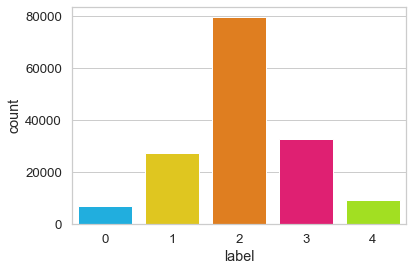

In [46]:
sns.countplot(labels)

Oh no...so theres a pretty big data imbalance. I should consider combining label 0,1 and 3,4

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

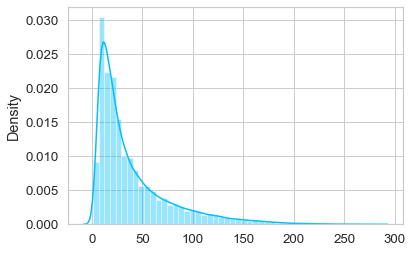

In [48]:
lengths = [len(t) for t in text]
sns.distplot(lengths)

Average of *4 Characters* per word. <br/>
Most around 10-12 words <br/>
Up to around 75 words